In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [9]:
df = pd.read_excel("Pumpkin_Seeds_Dataset.xlsx")

In [10]:
df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,Ürgüp Sivrisi
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,Ürgüp Sivrisi
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,Ürgüp Sivrisi
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Ürgüp Sivrisi


### Ennustetaan Class-muuttujaa

In [11]:
X = df.drop('Class', axis=1)
y = df['Class']

### Luodaan elbow-malli selitetystä varianssista ja komponenttien määrästä

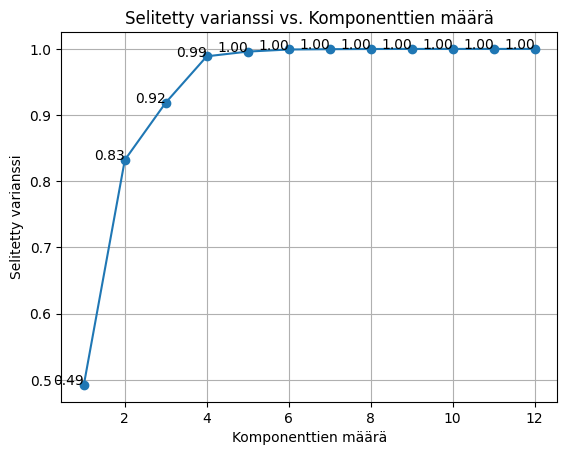

In [12]:

n_components_range = range(1, 13)
explained_variance = []

# Määritetään Pipeline skaalaukselle ja PCA:lle
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA())
])

for n_components in n_components_range:
    # Asetetaan PCA-komponenttien määrä
    pipeline.set_params(pca__n_components=n_components)
    # Skaalataan ja sovitetaan data Pipeline:n avulla
    pipeline.fit(X)
    explained_variance.append(np.sum(pipeline.named_steps['pca'].explained_variance_ratio_))

# Piirretään selitetty varianssi komponenttien määrän funktiona
plt.plot(n_components_range, explained_variance, marker='o', linestyle='-')
plt.xlabel('Komponenttien määrä')
plt.ylabel('Selitetty varianssi')
plt.title('Selitetty varianssi vs. Komponenttien määrä')
plt.grid(True)

# Lisätään arvot pisteiden vieressä
for i, txt in enumerate(explained_variance):
    plt.text(n_components_range[i], explained_variance[i], f'{explained_variance[i]:.2f}', ha='right')

plt.show()

In [13]:
# Suoritetaan train-test-split 70-30 jaolla
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# PCA

### SVC-malli

In [14]:

pipeline = Pipeline([
    ('pca', PCA(n_components=4)),
    ('scaler', StandardScaler()), # Skaalataan vasta PCA-määrittelyn jälkeen
    ('classifier', SVC())  
])

# Määritellään parametrit, joita halutaan kokeilla GridSearchin avulla
parameters = {
    'classifier__C': [0.1, 1, 10, 100], 
    'classifier__gamma': ['scale', 'auto'],  
    'classifier__degree': [2, 3, 4, 5, 6, 7],
    'classifier__kernel': ['linear', 'poly', 'rbf']  
}

# Määritetään GridSearch
grid_search = GridSearchCV(pipeline, parameters, verbose=1, cv=5, n_jobs = -1)

# Suoritetaan GridSearch käyttäen vain train-dataa
grid_search.fit(X_train, y_train)

# Tulostetaan parhaat parametrit ja tulos
print("Parhaat parametrit:", grid_search.best_params_)
print("Paras tulos:", grid_search.best_score_)


Fitting 5 folds for each of 144 candidates, totalling 720 fits


Parhaat parametrit: {'classifier__C': 10, 'classifier__degree': 2, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}
Paras tulos: 0.893142857142857


### Tehdään uusi GridSearch paremman C-arvon löytämiseksi

In [15]:

pipeline = Pipeline([
    ('pca', PCA(n_components=4)),
    ('scaler', StandardScaler()),  
    ('classifier', SVC())  
])

# Määritellään parametrit, joita halutaan kokeilla GridSearchin avulla
parameters = {
    'classifier__C': [8,9,10,11,12,13], 
    'classifier__gamma': ['scale', 'auto'],  
    'classifier__degree': [2, 3, 4, 5, 6, 7],
    'classifier__kernel': ['linear', 'poly', 'rbf']  
}

grid_search = GridSearchCV(pipeline, parameters, verbose=1, cv=5, n_jobs = -1)
grid_search.fit(X_train, y_train)

print("Parhaat parametrit:", grid_search.best_params_)
print("Paras tulos:", grid_search.best_score_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Parhaat parametrit: {'classifier__C': 12, 'classifier__degree': 2, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}
Paras tulos: 0.8937142857142858


In [16]:
print(grid_search.best_estimator_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

Pipeline(steps=[('pca', PCA(n_components=4)), ('scaler', StandardScaler()),
                ('classifier', SVC(C=12, degree=2))])
               precision    recall  f1-score   support

   Çerçevelik       0.87      0.89      0.88       390
Ürgüp Sivrisi       0.88      0.86      0.87       360

     accuracy                           0.88       750
    macro avg       0.88      0.88      0.88       750
 weighted avg       0.88      0.88      0.88       750



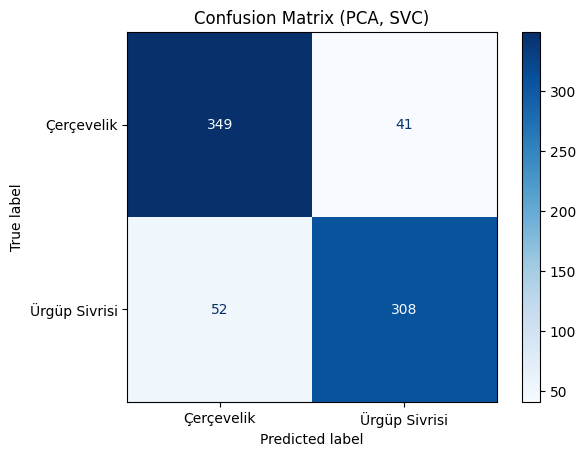

In [17]:
cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (PCA, SVC)")
plt.show()

---

# Kernel PCA

 
### Logistic Regression

In [18]:
from sklearn.decomposition import KernelPCA
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('kpca', KernelPCA(n_components = 4)),
    ('scaler', StandardScaler()), 
    ('classifier', LogisticRegression())
])

# Määritellään parametrit
LR_parameters = {
    'kpca__kernel': ['rbf', 'poly'],  
    'kpca__gamma': np.linspace(0.001, 0.04, 10),  
    'classifier__C': [0.1, 1, 10], 
}

grid_search = GridSearchCV(pipeline, LR_parameters, cv=5, verbose=1, n_jobs = -1)

# Suoritetaan GridSearch
grid_search.fit(X_train, y_train)

# Tulostetaan parhaat parametrit ja tulos
print("Parhaat parametrit:", grid_search.best_params_)
print("Paras tulos:", grid_search.best_score_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Parhaat parametrit: {'classifier__C': 1, 'kpca__gamma': 0.001, 'kpca__kernel': 'poly'}
Paras tulos: 0.8914285714285715


In [19]:
print(grid_search.best_estimator_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

Pipeline(steps=[('kpca', KernelPCA(gamma=0.001, kernel='poly', n_components=4)),
                ('scaler', StandardScaler()),
                ('classifier', LogisticRegression(C=1))])
               precision    recall  f1-score   support

   Çerçevelik       0.87      0.90      0.88       390
Ürgüp Sivrisi       0.89      0.86      0.87       360

     accuracy                           0.88       750
    macro avg       0.88      0.88      0.88       750
 weighted avg       0.88      0.88      0.88       750



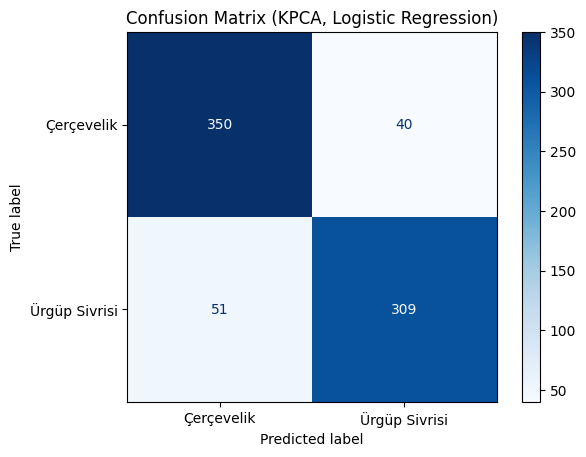

In [20]:
cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (KPCA, Logistic Regression)")
plt.show()

---

## SVC

In [21]:
pipeline = Pipeline([
    ('kpca', KernelPCA(n_components = 4)),
    ('scaler', StandardScaler()), 
    ('classifier', SVC())
])

# Määritellään parametrit
svm_para = {
    'kpca__kernel': ['rbf', 'poly'],
    'kpca__gamma': np.linspace(0.001, 0.04, 10),  
    'classifier__C': [0.1, 1, 10], 
}

# Määritetään GridSearch
grid_search = GridSearchCV(pipeline, svm_para, cv=5, verbose=1, n_jobs = -1)

# Suoritetaan GridSearch
grid_search.fit(X_train, y_train)

# Tulostetaan parhaat parametrit ja tulos
print("Parhaat parametrit:", grid_search.best_params_)
print("Paras tulos:", grid_search.best_score_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Parhaat parametrit: {'classifier__C': 1, 'kpca__gamma': 0.001, 'kpca__kernel': 'poly'}
Paras tulos: 0.892


In [22]:
print(grid_search.best_estimator_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

Pipeline(steps=[('kpca', KernelPCA(gamma=0.001, kernel='poly', n_components=4)),
                ('scaler', StandardScaler()), ('classifier', SVC(C=1))])
               precision    recall  f1-score   support

   Çerçevelik       0.87      0.91      0.89       390
Ürgüp Sivrisi       0.90      0.85      0.87       360

     accuracy                           0.88       750
    macro avg       0.88      0.88      0.88       750
 weighted avg       0.88      0.88      0.88       750



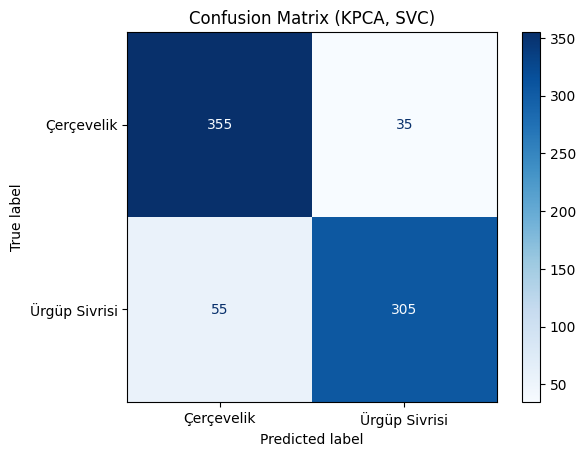

In [23]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (KPCA, SVC)")
plt.show()

---

## Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('kpca', KernelPCA(n_components=4)),
    ('scaler', StandardScaler()), 
    ('classifier', RandomForestClassifier())
])

RFC_para = {'classifier__criterion':['gini','entropy'],
            'classifier__max_depth':[2,4,6,8,10],
            'classifier__bootstrap': [True,False]}

grid_search = GridSearchCV(pipeline, RFC_para, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'classifier__bootstrap': True, 'classifier__criterion': 'entropy', 'classifier__max_depth': 10}
Best score: 0.8851428571428572


In [25]:
print(grid_search.best_estimator_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

Pipeline(steps=[('kpca', KernelPCA(n_components=4)),
                ('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(criterion='entropy', max_depth=10))])
               precision    recall  f1-score   support

   Çerçevelik       0.87      0.91      0.89       390
Ürgüp Sivrisi       0.89      0.85      0.87       360

     accuracy                           0.88       750
    macro avg       0.88      0.88      0.88       750
 weighted avg       0.88      0.88      0.88       750



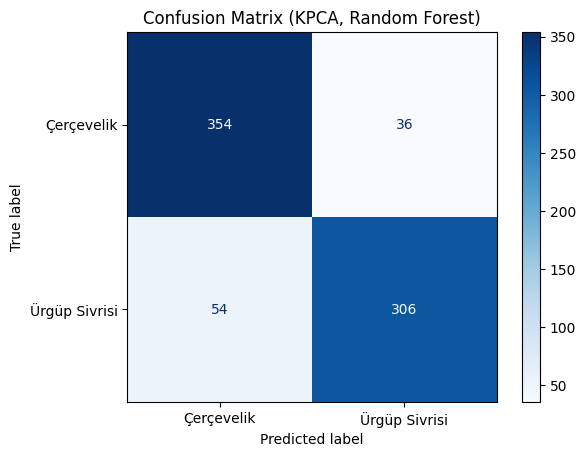

In [26]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (KPCA, Random Forest)")
plt.show()

---

## KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [28]:

pipeline = Pipeline([
    ('kpca', KernelPCA(n_components=4)),
    ('scaler', StandardScaler()), 
    ('classifier', KNeighborsClassifier())
])

knn_para = {'classifier__n_neighbors':[1,2,3,4,5,6,7,8,9,10],
         'classifier__weights':['uniform','distance'],
         'classifier__metric':['euclidean','manhattan','minkowski']}

grid_search = GridSearchCV(pipeline, knn_para, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


Best parameters: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 10, 'classifier__weights': 'distance'}
Best score: 0.8897142857142857


In [29]:
print(grid_search.best_estimator_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

Pipeline(steps=[('kpca', KernelPCA(n_components=4)),
                ('scaler', StandardScaler()),
                ('classifier',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=10,
                                      weights='distance'))])
               precision    recall  f1-score   support

   Çerçevelik       0.86      0.89      0.88       390
Ürgüp Sivrisi       0.88      0.84      0.86       360

     accuracy                           0.87       750
    macro avg       0.87      0.87      0.87       750
 weighted avg       0.87      0.87      0.87       750



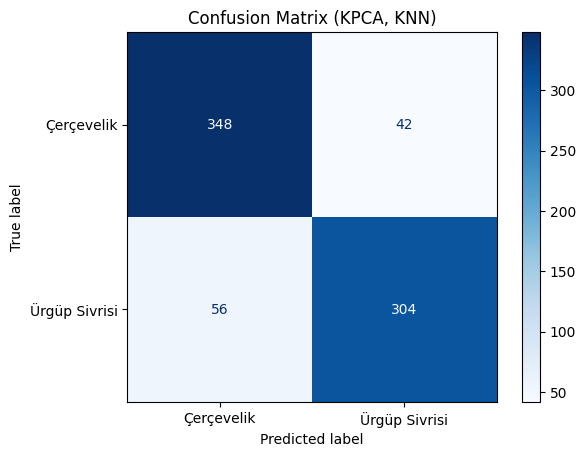

In [30]:
cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (KPCA, KNN)")
plt.show()

---

## Ensemble

In [44]:
from sklearn.ensemble import HistGradientBoostingClassifier, VotingClassifier

rf_classifier = RandomForestClassifier()
knn_classifier = KNeighborsClassifier()
logreg_classifier = LogisticRegression()
svc_classifier = SVC()
hist_gradient_boosting_classifier = HistGradientBoostingClassifier()

ensemble_classifier = VotingClassifier(
    estimators=[('rf', rf_classifier), ('knn', knn_classifier), ('logreg', logreg_classifier), ('svc', svc_classifier), ('hgb', hist_gradient_boosting_classifier)]
)

ensemble_classifier.fit(X_train, y_train)

ensemble_accuracy = ensemble_classifier.score(X_test, y_test)
print(f"Ensemble Classifier Accuracy: {ensemble_accuracy:.3f}")

Ensemble Classifier Accuracy: 0.879
